In [15]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
import sklearn
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None) 

import warnings
warnings.filterwarnings('ignore')

In [72]:
data = pd.read_csv('/Users/advaith/Desktop/MSBA Related coursework/Fall Term/Marketing Analytics /Project/Data/marketing_campaign.csv',sep='\t')  # Load all sheets to understand the structure if multiple

# Display sheet names to understand file structure
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [73]:
df = data

In [12]:
# Data Cleaning Step

# 1. Checking for missing values
missing_values = df.isnull().sum()

# 2. Duplicates
duplicates = df.duplicated().sum()

# 3. Data type adjustments for `Dt_Customer` column (Customer since date)
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')  # Convert to datetime format

# 4. Fill or drop missing values for further steps
# For simplicity, we'll drop rows with missing data for this demo, but real analysis may consider imputation
df = df.dropna()

# Summary of cleaning
{
    "missing_values": missing_values,
    "duplicates": duplicates,
    "data_types": df.dtypes
}


{'missing_values': ID                      0
 Year_Birth              0
 Education               0
 Marital_Status          0
 Income                 24
 Kidhome                 0
 Teenhome                0
 Dt_Customer             0
 Recency                 0
 MntWines                0
 MntFruits               0
 MntMeatProducts         0
 MntFishProducts         0
 MntSweetProducts        0
 MntGoldProds            0
 NumDealsPurchases       0
 NumWebPurchases         0
 NumCatalogPurchases     0
 NumStorePurchases       0
 NumWebVisitsMonth       0
 AcceptedCmp3            0
 AcceptedCmp4            0
 AcceptedCmp5            0
 AcceptedCmp1            0
 AcceptedCmp2            0
 Complain                0
 Z_CostContact           0
 Z_Revenue               0
 Response                0
 dtype: int64,
 'duplicates': np.int64(0),
 'data_types': ID                              int64
 Year_Birth                      int64
 Education                      object
 Marital_Status          

## Exploratory Data Analysis

In [77]:
df['Frequency'] = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)
df['Monetary'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].sum(axis=1)
#df[['ID', 'Recency', 'Frequency', 'Monetary']]

### univariate analysis

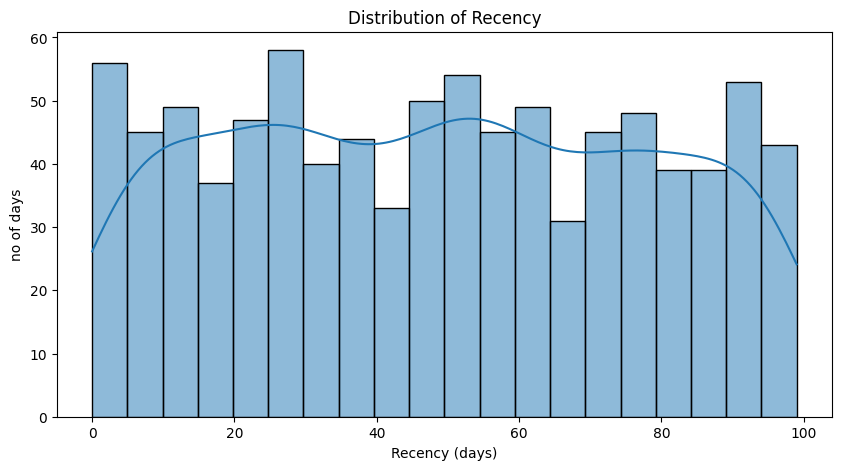

In [16]:
# Recency
plt.figure(figsize=(10, 5))
sns.histplot(df['Recency'], kde=True, bins=20)
plt.title('Distribution of Recency')
plt.xlabel('Recency (days)')
plt.ylabel('no of days')
plt.show()

- Recency appears to be pretty uniform across the range of values, with most customers having a recency between 0 and 100 days
- Steady level of engagement among the customers as we do not appear to have any skewed distribution
- Customer base likely to have equal distribution of mix of recently active and somewhat inactive customers

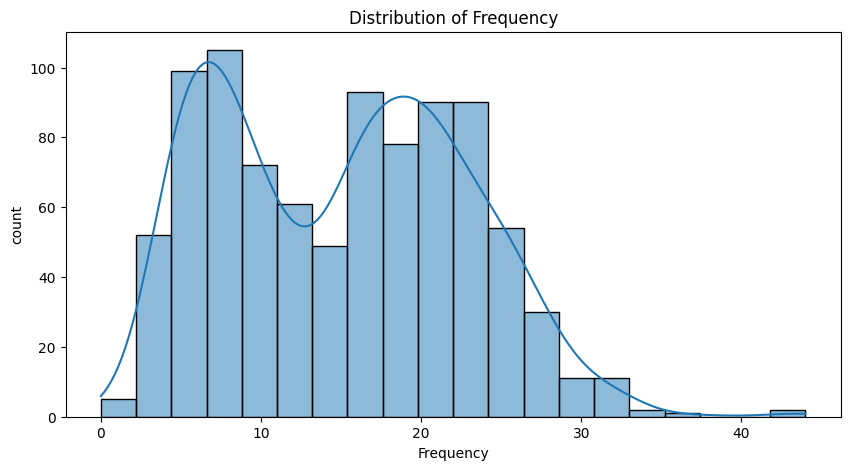

In [17]:
# Frequency
plt.figure(figsize=(10, 5))
sns.histplot(df['Frequency'], kde=True, bins=20)
plt.title('Distribution of Frequency')
plt.xlabel('Frequency')
plt.ylabel('count')
plt.show()

 - Distribution is righ-skewed indicating most of the customers are making fewwer than 10 purchases
 - Very few set of custoemrs seem to be frequent buyers
 - Smaller customer segment would make multiple purchases, while most of them have lower engagement

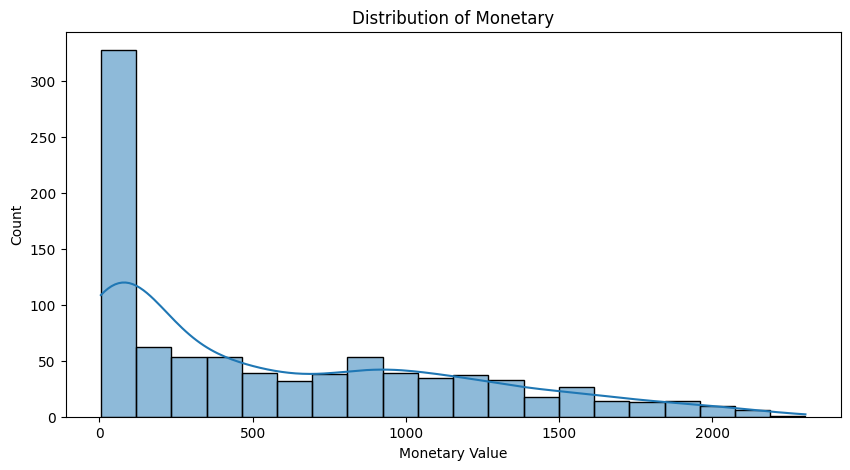

In [18]:
# Monetory
plt.figure(figsize=(10, 5))
sns.histplot(df['Monetary'], kde=True, bins=20)
plt.title('Distribution of Monetary')
plt.xlabel('Monetary Value')
plt.ylabel('Count')
plt.show()

- This distribution heavily right skewed indicating that most of the customers are spending low amounts, while a very few have high spending levels
- Customer segment - low-value customers with small segment of high-value customers
- Small portion og customers contribute to significant portion of revenue. 

### bivariate analysis

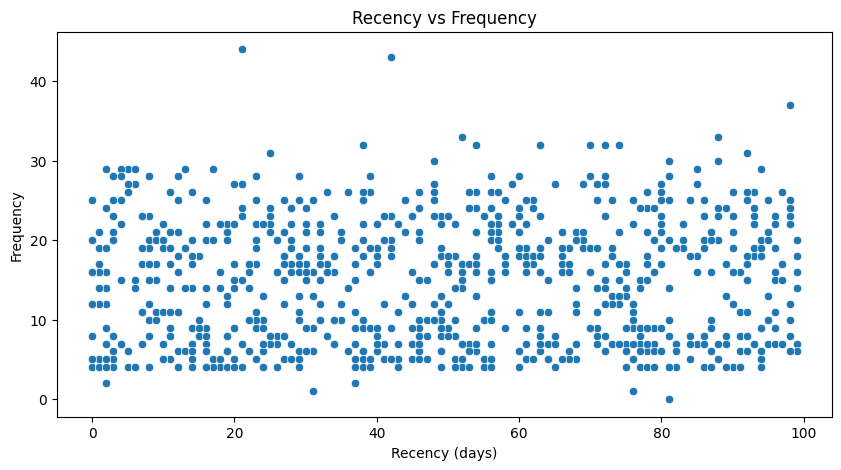

In [19]:
# recency vs freq
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Recency', y='Frequency', data=df)
plt.title('Recency vs Frequency')
plt.xlabel('Recency (days)')
plt.ylabel('Frequency')
plt.show()

 - Even spread of values indicating no strong correlation between recency and frequency
 - Recent and not so recent - both have varying purchase frequencies
 - There isn’t a clear trend indicating that recent buyers (lower recency) necessarily make more purchases than older customers.

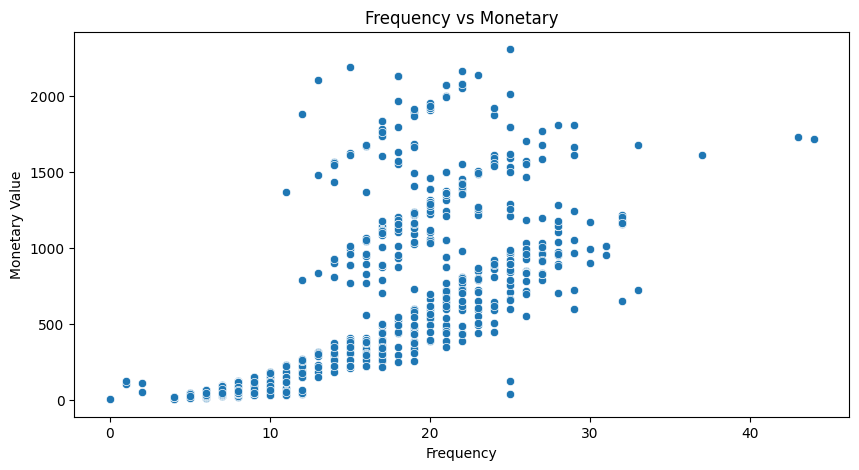

In [20]:
#freq vs monetory
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Frequency', y='Monetary', data=df)
plt.title('Frequency vs Monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary Value')
plt.show()

- Strong correlation between frequency and monetory value
- high freq customers have high monetory valeus, indicating customers who buy more also spend more
- Increasing purchase frequency could increase overall spending per customer
  

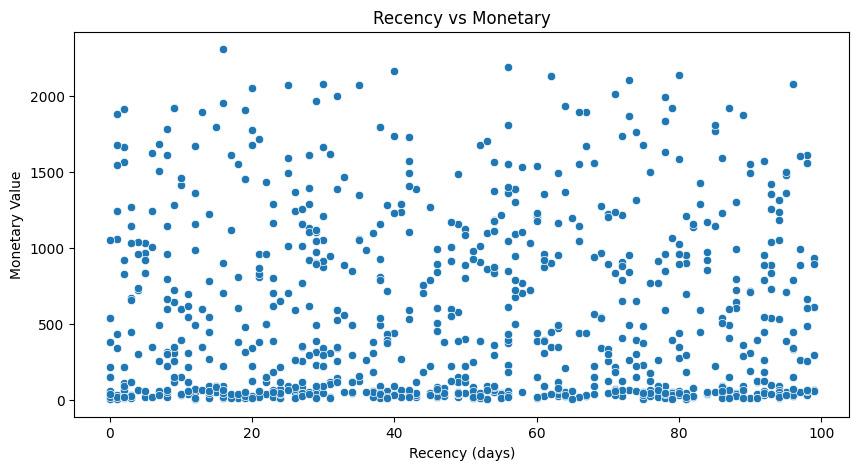

In [21]:
#recency vs monetory
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Recency', y='Monetary', data=df)
plt.title('Recency vs Monetary')
plt.xlabel('Recency (days)')
plt.ylabel('Monetary Value')
plt.show()

- Similar to the Recency vs Frequency plot, there doesn’t seem to be a strong correlation between recency and monetary value.
- High-value customers (with higher monetary spending) are spread across different recency values, indicating that even customers who haven’t purchased recently can have high monetary values.
- This suggests that recency alone may not be a sufficient indicator of a high-value customer, and frequency and monetary value may play a more significant role.

#### Overall:

- Frequency and Monetary have a strong positive relationship, indicating that more frequent buyers tend to spend more.
- Recency doesn’t show a clear correlation with either frequency or monetary value, suggesting that it may not directly impact the value of the customer.

## Hypothesis testing

### 1. Customers who make frequent purchases or have high monetory spends are more likely to be high-value

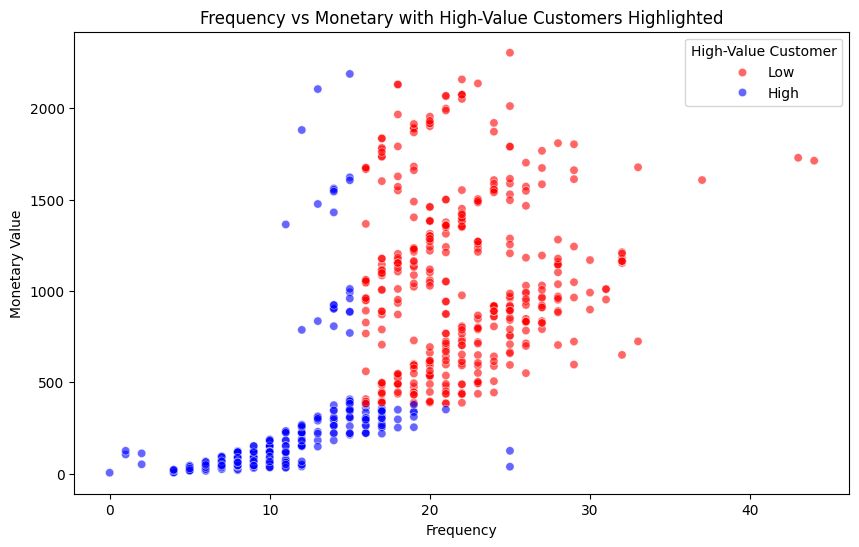

In [22]:
# To validate the hypothesis, we can create a scatter plot of Frequency vs Monetary with color-coding for High-Value Customers.
# We can define high-value customers as those above the median for both frequency and monetary spending.

import matplotlib.pyplot as plt
import seaborn as sns

# Define high-value customers based on being above the median in both Frequency and Monetary.
df['High_Value'] = ((df['Frequency'] >= df['Frequency'].median()) & 
                        (df['Monetary'] >= df['Monetary'].median())).astype(int)

# Scatter plot for Frequency vs Monetary with High-Value customers highlighted
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Frequency', y='Monetary', hue='High_Value', palette={0: 'blue', 1: 'red'}, alpha=0.6)
plt.title('Frequency vs Monetary with High-Value Customers Highlighted')
plt.xlabel('Frequency')
plt.ylabel('Monetary Value')
plt.legend(title='High-Value Customer', labels=['Low', 'High'])
plt.show()


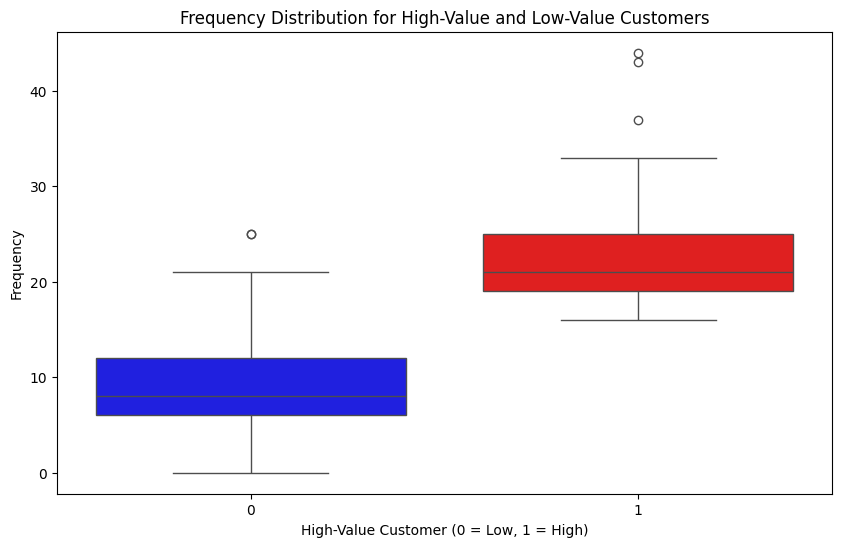

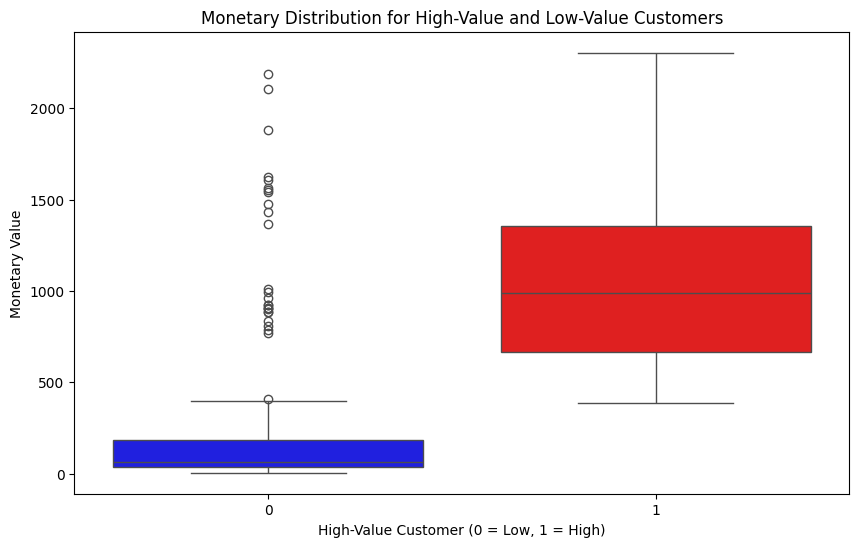

In [23]:
# Ensure High_Value is treated as a categorical variable
df['High_Value1'] = df['High_Value'].astype('category')

# Box plot for Frequency
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='High_Value', y='Frequency', palette=['blue', 'red'])
plt.title('Frequency Distribution for High-Value and Low-Value Customers')
plt.xlabel('High-Value Customer (0 = Low, 1 = High)')
plt.ylabel('Frequency')
plt.show()

# Box plot for Monetary
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='High_Value', y='Monetary', palette=['blue', 'red'])
plt.title('Monetary Distribution for High-Value and Low-Value Customers')
plt.xlabel('High-Value Customer (0 = Low, 1 = High)')
plt.ylabel('Monetary Value')
plt.show()


- High-Value Customers (in red) tend to have both higher purchase frequency and higher monetary spending. This aligns with the hypothesis that customers who make frequent purchases and have high monetary spending are more likely to be high-value.
- Low-Value Customers (in blue) are clustered towards the lower end of both frequency and monetary value, indicating they are less engaged and spend less.


### 2. Income and family size might impact purchasing behavior, affecting the customer value

In [249]:
# # Calculate the 99th percentile for Income and Monetary
# income_threshold = df['Income'].quantile(0.99)
# monetary_threshold = df['Monetary'].quantile(0.99)

# # Filter out the outliers
# df_filtered = df[(df['Income'] <= income_threshold) & (df['Monetary'] <= monetary_threshold)]

# # Scatter plot of Income vs Monetary with Family Size and High-Value Customers highlighted (after removing outliers)
# plt.figure(figsize=(12, 8))
# sns.scatterplot(data=df_filtered, x='Income', y='Monetary', size='Family_Size', hue='High_Value',
#                 sizes=(20, 200), palette={0: 'blue', 1: 'red'}, alpha=0.6, legend='brief')
# plt.title('Income vs Monetary with Family Size and High-Value Customers')
# plt.xlabel('Income')
# plt.ylabel('Monetary Value')
# plt.legend(title='High-Value Customer', labels=['Low', 'High'])
# plt.show()

In [251]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Frequency,Monetary,High_Value
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,25,1529,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,6,21,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,21,734,1
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,8,48,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,19,407,1


### Finding alpha and beta values

In [257]:
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split

# # Define target variable (e.g., 'Monetary' as a proxy for high-value, or another target if available)
# y = df['Monetary']  # Replace this with your actual target variable if different

# # Prepare features for the score formula
# X = df[['Recency', 'Frequency', 'Monetary']]
# X['Recency_Frequency'] = X['Recency'] * X['Frequency']
# X['Frequency_Monetary'] = X['Frequency'] * X['Monetary']
# X['Monetary_Recency'] = X['Monetary'] * X['Recency']
# X['Recency_Frequency_Monetary'] = X['Recency'] * X['Frequency'] * X['Monetary']

# # Split the data for training and testing
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Fit a Linear Regression model
# model = LinearRegression()
# model.fit(X_train, y_train)

# # Extract the coefficients
# alpha = model.intercept_
# beta1, beta2, beta3, beta4, beta5, beta6, beta7 = model.coef_

# # Display the optimized values
# print("Optimized values:")
# print(f"alpha = {alpha}")
# print(f"beta1 = {beta1}, beta2 = {beta2}, beta3 = {beta3}")
# print(f"beta4 = {beta4}, beta5 = {beta5}, beta6 = {beta6}, beta7 = {beta7}")

# # Optionally, you can evaluate the model on test data
# from sklearn.metrics import mean_squared_error, r2_score
# y_pred = model.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
# print(f"Mean Squared Error: {mse}")
# print(f"R-squared: {r2}")


In [259]:
# alpha = -1.1368683772161603e-13
# beta1 = 5.800134617765302e-14 
# beta2 = 7.218572855110086e-15
# beta3 = 0.9999999999999999
# beta4 = -2.0644733651376006e-15
# beta5 = -4.522118405388867e-17
# beta6 = -6.584552729190058e-17
# beta7 = 1.9661054496890136e-18

In [261]:
# df['score'] = (alpha 
#                + beta1 * df['Recency'] 
#                + beta2 * df['Frequency'] 
#                + beta3 * df['Monetary'] 
#                + beta4 * df['Recency'] * df['Frequency'] 
#                + beta5 * df['Frequency'] * df['Monetary'] 
#                + beta6 * df['Monetary'] * df['Recency'] 
#                + beta7 * df['Frequency'] * df['Recency'] * df['Monetary'])

In [144]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Frequency,Monetary,High_Value,Family_Size,score
0,5524,1957,Graduation,Single,58138.0,0.0,0,2012-04-09,58,635,...,0,0,3,11,1,25,1529,1,0.0,1529.0
1,2174,1954,Graduation,Single,46344.0,1.0,1,2014-08-03,38,11,...,0,0,3,11,0,6,21,0,2.0,21.0
2,4141,1965,Graduation,Together,71613.0,0.0,0,2013-08-21,26,426,...,0,0,3,11,0,21,734,1,0.0,734.0
3,6182,1984,Graduation,Together,26646.0,1.0,0,2014-10-02,26,11,...,0,0,3,11,0,8,48,0,1.0,48.0
4,5324,1981,PhD,Married,58293.0,1.0,0,2014-01-19,94,173,...,0,0,3,11,0,19,407,1,1.0,407.0


In [141]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Frequency,Monetary,High_Value,Family_Size,score
count,2216.000000,2216.000000,2216.000000,2215.000000,2216.000000,2216,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.0,2216.0,2216.000000,2216.000000,2216.000000,2216.000000,2215.000000,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441986,0.505415,2013-07-11 23:50:54.151624704,49.012635,305.091606,26.356047,166.995939,...,0.013538,0.009477,3.0,11.0,0.150271,14.880866,563.110108,0.476534,0.947178,563.110108
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-01-08 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,3.0,11.0,0.000000,0.000000,4.000000,0.000000,0.000000,4.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,2013-01-19 00:00:00,24.000000,24.000000,2.000000,16.000000,...,0.000000,0.000000,3.0,11.0,0.000000,8.000000,55.000000,0.000000,0.000000,55.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-11 00:00:00,49.000000,174.500000,8.000000,68.000000,...,0.000000,0.000000,3.0,11.0,0.000000,15.000000,342.500000,0.000000,1.000000,342.500000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-31 00:00:00,74.000000,505.000000,33.000000,232.250000,...,0.000000,0.000000,3.0,11.0,0.000000,21.000000,964.000000,1.000000,1.000000,964.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-12-06 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,1.000000,1.000000,3.0,11.0,1.000000,44.000000,2491.000000,1.000000,3.000000,2491.000000
std,3249.376275,11.985554,25173.076661,0.536935,0.544181,NaN,28.948352,337.327920,39.793917,224.283273,...,0.115588,0.096907,0.0,0.0,0.357417,7.670957,577.183371,0.499562,0.749230,577.183371


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define a binary target variable (1 if high-value, 0 if low-value)
# For example, classify as high-value if Monetary is above the median
# threshold = df['Monetary'].median()

freq_threshold = df['Frequency'].quantile(0.75)
monetary_threshold = df['Monetary'].quantile(0.75)
df['High_Value'] = df['High_Value'] = ((df['Frequency'] >= freq_threshold) & (df['Monetary'] >= monetary_threshold)).astype(int)

# Redefine the target (y) and features (X)
y = df['High_Value']
X = df[['Recency', 'Frequency']]
X['Recency_Frequency'] = X['Recency'] * X['Frequency']
X['Frequency_Monetary'] = X['Frequency'] * df['Monetary']
X['Monetary_Recency'] = df['Monetary'] * X['Recency']
X['Recency_Frequency_Monetary'] = X['Recency'] * X['Frequency'] * df['Monetary']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a logistic regression model for classification
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Display coefficients
coefficients = model.coef_[0]
alpha = model.intercept_[0]
print("Optimized values:")
print(f"alpha = {alpha}")
print(f"beta1 (Recency) = {coefficients[0]}, beta2 (Frequency) = {coefficients[1]}")
print(f"beta4 (Recency * Frequency) = {coefficients[2]}")
print(f"beta5 (Frequency * Monetary) = {coefficients[3]}")
print(f"beta6 (Monetary * Recency) = {coefficients[4]}")
print(f"beta7 (Recency * Frequency * Monetary) = {coefficients[5]}")

Accuracy: 0.9779005524861878
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       163
           1       1.00      0.78      0.88        18

    accuracy                           0.98       181
   macro avg       0.99      0.89      0.93       181
weighted avg       0.98      0.98      0.98       181

[[163   0]
 [  4  14]]
Optimized values:
alpha = -0.02072982379897778
beta1 (Recency) = -0.10219913205492338, beta2 (Frequency) = -0.13022009294851133
beta4 (Recency * Frequency) = -0.005954009029846028
beta5 (Frequency * Monetary) = 8.177713972657691e-05
beta6 (Monetary * Recency) = -0.00032629504597103193
beta7 (Recency * Frequency * Monetary) = 2.2985440007269624e-05


In [87]:
alpha = -0.02423542463644679
beta1 = -0.14134771680504543
beta2 = -0.1786572436495882
beta4 = -0.0019375867553737438
beta5 = 0.0001297929744405418
beta6 = -0.0002934209548644681
beta7 = 1.9958702944796875e-05

# Modeling

### Restoring original data frame

In [35]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
import sklearn
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None) 

import warnings
warnings.filterwarnings('ignore')

In [36]:
data = pd.read_excel('/Users/advaith/Desktop/MSBA Related coursework/Fall Term/Marketing Analytics /Project/Data/Marketing Campaign.xlsx')
df=data

# Data Cleaning 

missing_values = df.isnull().sum()

duplicates = df.duplicated().sum()

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')  # Convert to datetime format

# 4. Fill or drop missing values for further steps
# For simplicity, we'll drop rows with missing data for this demo, but real analysis may consider imputation
#df = df.dropna()

df['Frequency'] = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)
df['Monetary'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].sum(axis=1)

### Adding in score metric

In [37]:
alpha = -0.02423542463644679
beta1 = -0.14134771680504543
beta2 = -0.1786572436495882
beta4 = -0.0019375867553737438
beta5 = 0.0001297929744405418
beta6 = -0.0002934209548644681
beta7 = 1.9958702944796875e-05

In [38]:
df['score'] = (alpha + beta1 * df['Recency'] + beta2 * df['Frequency'] 
               + beta4 * df['Recency'] * df['Frequency'] 
               + beta5 * df['Frequency'] * df['Monetary'] 
               + beta6 * df['Monetary'] * df['Recency'] 
               + beta7 * df['Frequency'] * df['Recency'] * df['Monetary'])

In [39]:
print(df['score'].max())
print(df['score'].min())

50.294351510602084
-31.59767522417772


### Score Standardization

Performing (Z-score Normalization)

Standardization shifts the mean of the scores to 0 and hence, scores above 0 are above the average, and those below 0 are below the average.

In [40]:
mean_score = df['score'].mean()
std_score = df['score'].std()

df['standardized_score'] = (df['score'] - mean_score) / std_score

Creating another df copy and preparing for modeling 

In [41]:
df_updated = df

In [42]:
df_updated.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Frequency,Monetary,score,standardized_score
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,25,1529,7.691287,1.910714
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,6,21,-7.031396,-0.121337


In [43]:
df_updated.drop(['Recency','Frequency','Monetary','score'],axis=1,inplace = True)

In [44]:
df_updated.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,standardized_score
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,1.910714
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,-0.121337
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0.281978
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,0.069515
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,-1.342627


Creating a data frame for just high value customers (customers with standardized_score > 0)

In [45]:
len(df_updated)

2240

In [46]:
mask = df_updated['standardized_score'] > 0
df_hvc = df_updated[mask]

In [47]:
#Viewing number of datapoints
len(df_hvc)

1112

In [48]:
income_mean = df_hvc['Income'].mean()
df_hvc['Income'].fillna(income_mean, inplace=True)

In [49]:
rows_with_na = df_hvc[df_hvc.isna().any(axis=1)]
print(rows_with_na)

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response, standardized_score]
Index: []


In [50]:
len(df_hvc)

1112

Need to perform one hot encoding for predictors which are categorical in nature.

In [51]:
df_hvc_encoded = pd.get_dummies(df_hvc, columns=['Education', 'Marital_Status'], drop_first=True)

Converting kidhome to int type because it is being getting read as char

In [52]:
# Convert 'Kidhome' to numeric, replacing any errors with NaN
df_hvc_encoded['Kidhome'] = pd.to_numeric(df_hvc_encoded['Kidhome'], errors='coerce')

# Fill any NaN values with a suitable value, such as the median or mean
df_hvc_encoded['Kidhome'].fillna(df_hvc_encoded['Kidhome'].median(), inplace=True)

In [53]:
print(df_hvc_encoded.dtypes)  # Check the data types of all columns

ID                                  int64
Year_Birth                          int64
Income                            float64
Kidhome                           float64
Teenhome                            int64
Dt_Customer                datetime64[ns]
MntWines                            int64
MntFruits                           int64
MntMeatProducts                     int64
MntFishProducts                     int64
MntSweetProducts                    int64
MntGoldProds                        int64
NumDealsPurchases                   int64
NumWebPurchases                     int64
NumCatalogPurchases                 int64
NumStorePurchases                   int64
NumWebVisitsMonth                   int64
AcceptedCmp3                        int64
AcceptedCmp4                        int64
AcceptedCmp5                        int64
AcceptedCmp1                        int64
AcceptedCmp2                        int64
Complain                            int64
Z_CostContact                     

<br>

## Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

# Assume today's date or the most recent date in your dataset as a reference
reference_date = pd.to_datetime("2016-01-01")  # Update to a relevant date
df_hvc_encoded['Days_Since_Enrollment'] = (reference_date - pd.to_datetime(df_hvc['Dt_Customer'])).dt.days

# Define features (X) including Days_Since_Enrollment and target (y)
X = df_hvc_encoded.drop(columns=['Response', 'ID', 'Dt_Customer'])  # Now Dt_Customer is replaced with Days_Since_Enrollment
y = df_hvc_encoded['Response']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7399103139013453
              precision    recall  f1-score   support

           0       0.76      0.96      0.85       167
           1       0.40      0.07      0.12        56

    accuracy                           0.74       223
   macro avg       0.58      0.52      0.48       223
weighted avg       0.67      0.74      0.67       223

[[161   6]
 [ 52   4]]


## Logistic Regression with K-Fold cross validation

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import numpy as np

# Assume today's date or the most recent date in your dataset as a reference
reference_date = pd.to_datetime("2016-01-01")  # Update to a relevant date
df_hvc_encoded['Days_Since_Enrollment'] = (reference_date - pd.to_datetime(df_hvc['Dt_Customer'])).dt.days

# Define features (X) including Days_Since_Enrollment and target (y)
X = df_hvc_encoded.drop(columns=['Response', 'ID', 'Dt_Customer'])  # Now Dt_Customer is replaced with Days_Since_Enrollment
y = df_hvc_encoded['Response']

# Initialize the logistic regression model
model = LogisticRegression()

# Define K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform Cross Validation and get accuracy scores
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Print Cross Validation results
print(f'Cross Validation Accuracy scores: {cv_scores}')
print(f'Mean Accuracy score: {np.mean(cv_scores)}')

# Fit the model using the train-test split to compare results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Cross Validation Accuracy scores: [0.73991031 0.75784753 0.75675676 0.81531532 0.76576577]
Mean Accuracy score: 0.7671191370742939
Test Accuracy: 0.7399103139013453
              precision    recall  f1-score   support

           0       0.76      0.96      0.85       167
           1       0.40      0.07      0.12        56

    accuracy                           0.74       223
   macro avg       0.58      0.52      0.48       223
weighted avg       0.67      0.74      0.67       223

[[161   6]
 [ 52   4]]


## Random Forest

In [24]:
from sklearn.metrics import precision_recall_curve, auc, average_precision_score
import matplotlib.pyplot as plt

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

# Define features (X) and target (y)
# Drop 'Dt_Customer' column since it is a datetime type, which is incompatible
X = df_hvc_encoded.drop(columns=['Response', 'ID', 'Dt_Customer'])  
y = df_hvc_encoded['Response']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the random forest model
model = RandomForestClassifier(random_state=42, n_estimators=100)  # You can adjust n_estimators
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Optional: Feature importance
feature_importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importances:")
print(importance_df)

Accuracy: 0.820627802690583
              precision    recall  f1-score   support

           0       0.82      0.97      0.89       167
           1       0.81      0.38      0.51        56

    accuracy                           0.82       223
   macro avg       0.82      0.67      0.70       223
weighted avg       0.82      0.82      0.80       223

[[162   5]
 [ 35  21]]

Feature Importances:
                    Feature  Importance
1                    Income    0.070747
6           MntMeatProducts    0.067551
4                  MntWines    0.064427
35    Days_Since_Enrollment    0.059454
23       standardized_score    0.059016
13        NumStorePurchases    0.054984
14        NumWebVisitsMonth    0.051119
0                Year_Birth    0.049495
9              MntGoldProds    0.046984
18             AcceptedCmp1    0.045639
8          MntSweetProducts    0.045623
15             AcceptedCmp3    0.041819
7           MntFishProducts    0.041508
12      NumCatalogPurchases    0.039287


## XG Boost

In [26]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

# Define features (X) and target (y)
X = df_hvc_encoded.drop(columns=['Response', 'ID', 'Dt_Customer'])
y = df_hvc_encoded['Response']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the XGBoost model
model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')  # Suppresses warnings
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Optional: Feature importance
feature_importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importances:")
print(importance_df)

Accuracy: 0.8071748878923767
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       167
           1       0.66      0.48      0.56        56

    accuracy                           0.81       223
   macro avg       0.75      0.70      0.72       223
weighted avg       0.79      0.81      0.80       223

[[153  14]
 [ 29  27]]

Feature Importances:
                    Feature  Importance
18             AcceptedCmp1    0.101736
17             AcceptedCmp5    0.099276
19             AcceptedCmp2    0.069999
15             AcceptedCmp3    0.066902
29  Marital_Status_Divorced    0.046108
31    Marital_Status_Single    0.044854
14        NumWebVisitsMonth    0.038438
13        NumStorePurchases    0.037579
3                  Teenhome    0.033572
12      NumCatalogPurchases    0.032603
30   Marital_Status_Married    0.030172
27            Education_PhD    0.028017
33     Marital_Status_Widow    0.027981
6           MntMeatProducts    0.027677

## Neural Network

In [108]:
#pip install tensorflow

In [130]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define features (X) and target (y)
X = df_hvc_encoded.drop(columns=['AcceptedCmp5', 'ID', 'Dt_Customer'])
y = df_hvc_encoded['AcceptedCmp5']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features for better neural network performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype(int).flatten()  # Convert probabilities to binary predictions
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5458 - loss: 0.6679 - val_accuracy: 0.8767 - val_loss: 0.4978
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8847 - loss: 0.4123 - val_accuracy: 0.8630 - val_loss: 0.4058
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8537 - loss: 0.3563 - val_accuracy: 0.8767 - val_loss: 0.3666
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8700 - loss: 0.2834 - val_accuracy: 0.8630 - val_loss: 0.3466
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8880 - loss: 0.2415 - val_accuracy: 0.8493 - val_loss: 0.3386
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9238 - loss: 0.2013 - val_accuracy: 0.8767 - val_loss: 0.3368
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9376 - loss: 0.1926 - val_accuracy: 0.8630 - val_loss: 0.3412
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9539 - loss: 0.1610 - val_accuracy: 0.8356 - val_loss:

<br>

## Dropping NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, Frequency, Monetary and then Remodeling

In [32]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
import sklearn
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None) 

import warnings
warnings.filterwarnings('ignore')

In [33]:
data = pd.read_excel('/Users/advaith/Desktop/MSBA Related coursework/Fall Term/Marketing Analytics /Project/Data/Marketing Campaign.xlsx')
df=data

# Data Cleaning 

missing_values = df.isnull().sum()

duplicates = df.duplicated().sum()

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')  # Convert to datetime format

# 4. Fill or drop missing values for further steps
# For simplicity, we'll drop rows with missing data for this demo, but real analysis may consider imputation
#df = df.dropna()

df['Frequency'] = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)
df['Monetary'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']].sum(axis=1)

In [34]:
alpha = -0.02423542463644679
beta1 = -0.14134771680504543
beta2 = -0.1786572436495882
beta4 = -0.0019375867553737438
beta5 = 0.0001297929744405418
beta6 = -0.0002934209548644681
beta7 = 1.9958702944796875e-05

In [35]:
df['score'] = (alpha + beta1 * df['Recency'] + beta2 * df['Frequency'] 
               + beta4 * df['Recency'] * df['Frequency'] 
               + beta5 * df['Frequency'] * df['Monetary'] 
               + beta6 * df['Monetary'] * df['Recency'] 
               + beta7 * df['Frequency'] * df['Recency'] * df['Monetary'])

In [36]:
mean_score = df['score'].mean()
std_score = df['score'].std()

df['standardized_score'] = (df['score'] - mean_score) / std_score

In [37]:
df_updated = df

In [38]:
df_updated.drop(['Recency','Frequency','Monetary','score','NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 
                                              'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                                              'MntSweetProducts','MntGoldProds'],axis=1,inplace = True)

In [39]:
mask = df_updated['standardized_score'] > 0
df_hvc = df_updated[mask]

In [40]:
income_mean = df_hvc['Income'].mean()
df_hvc['Income'].fillna(income_mean, inplace=True)

In [41]:
rows_with_na = df_hvc[df_hvc.isna().any(axis=1)]
print(rows_with_na)

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response, standardized_score]
Index: []


In [42]:
df_hvc_encoded = pd.get_dummies(df_hvc, columns=['Education', 'Marital_Status'], drop_first=True)

In [43]:
# Convert 'Kidhome' to numeric, replacing any errors with NaN
df_hvc_encoded['Kidhome'] = pd.to_numeric(df_hvc_encoded['Kidhome'], errors='coerce')

# Fill any NaN values with a suitable value, such as the median or mean
df_hvc_encoded['Kidhome'].fillna(df_hvc_encoded['Kidhome'].median(), inplace=True)

In [44]:
print(df_hvc_encoded.dtypes) 

ID                                  int64
Year_Birth                          int64
Income                            float64
Kidhome                           float64
Teenhome                            int64
Dt_Customer                datetime64[ns]
NumWebVisitsMonth                   int64
AcceptedCmp3                        int64
AcceptedCmp4                        int64
AcceptedCmp5                        int64
AcceptedCmp1                        int64
AcceptedCmp2                        int64
Complain                            int64
Z_CostContact                       int64
Z_Revenue                           int64
Response                            int64
standardized_score                float64
Education_Basic                      bool
Education_Graduation                 bool
Education_Master                     bool
Education_PhD                        bool
Marital_Status_Alone                 bool
Marital_Status_Divorced              bool
Marital_Status_Married            

## Lasso Regression with Logistic Regression for feature selection

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Define features (X) and target (y)
X = df_hvc_encoded.drop(columns=['Response', 'ID', 'Dt_Customer'])  # Define features
y = df_hvc_encoded['Response']  # Define target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression with L1 penalty (Lasso equivalent for classification)
lasso_logistic = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)

# Fit the model
lasso_logistic.fit(X_train, y_train)

# Get the coefficients of the features
lasso_coefficients = lasso_logistic.coef_.flatten()

# Create a DataFrame for the coefficients and feature names
feature_names = X.columns
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': lasso_coefficients})

# Filter the features with non-zero coefficients (important features)
selected_features = coefficients_df[coefficients_df['Coefficient'] != 0]

# Print the selected features
# Sort the selected_features DataFrame by the 'Coefficient' column in ascending order
sorted_features = selected_features.sort_values(by='Coefficient', ascending=True)

# Print the sorted DataFrame
print(sorted_features)

                    Feature  Coefficient
20   Marital_Status_Married    -1.123039
3                  Teenhome    -1.040896
22  Marital_Status_Together    -0.925188
2                   Kidhome    -0.177875
13       standardized_score    -0.104009
0                Year_Birth    -0.001133
1                    Income     0.000002
9              AcceptedCmp2     0.129971
23     Marital_Status_Widow     0.134590
15     Education_Graduation     0.186404
4         NumWebVisitsMonth     0.215589
16         Education_Master     0.481102
6              AcceptedCmp4     0.514627
17            Education_PhD     0.728059
8              AcceptedCmp1     1.306790
7              AcceptedCmp5     1.613345
5              AcceptedCmp3     1.631732


## Logistic Regression

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

# Assume today's date or the most recent date in your dataset as a reference
reference_date = pd.to_datetime("2016-01-01")  # Update to a relevant date
df_hvc_encoded['Days_Since_Enrollment'] = (reference_date - pd.to_datetime(df_hvc['Dt_Customer'])).dt.days

# Define features (X) including Days_Since_Enrollment and target (y)
X = df_hvc_encoded.drop(columns=['Response', 'ID', 'Dt_Customer'])  # Now Dt_Customer is replaced with Days_Since_Enrollment
y = df_hvc_encoded['Response']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8127853881278538
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       172
           1       0.62      0.34      0.44        47

    accuracy                           0.81       219
   macro avg       0.73      0.64      0.66       219
weighted avg       0.79      0.81      0.79       219

[[162  10]
 [ 31  16]]


## Logistic Regression with K-Fold cross validation

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import numpy as np

# Assume today's date or the most recent date in your dataset as a reference
reference_date = pd.to_datetime("2016-01-01")  # Update to a relevant date
df_hvc_encoded['Days_Since_Enrollment'] = (reference_date - pd.to_datetime(df_hvc['Dt_Customer'])).dt.days

# Define features (X) including Days_Since_Enrollment and target (y)
X = df_hvc_encoded.drop(columns=['Response', 'ID', 'Dt_Customer'])  # Now Dt_Customer is replaced with Days_Since_Enrollment
y = df_hvc_encoded['Response']

# Initialize the logistic regression model
model = LogisticRegression()

# Define K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform Cross Validation and get accuracy scores
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Print Cross Validation results
print(f'Cross Validation Accuracy scores: {cv_scores}')
print(f'Mean Accuracy score: {np.mean(cv_scores)}')

# Fit the model using the train-test split to compare results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Cross Validation Accuracy scores: [0.81278539 0.83105023 0.84474886 0.79908676 0.78538813]
Mean Accuracy score: 0.8146118721461187
Test Accuracy: 0.8127853881278538
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       172
           1       0.62      0.34      0.44        47

    accuracy                           0.81       219
   macro avg       0.73      0.64      0.66       219
weighted avg       0.79      0.81      0.79       219

[[162  10]
 [ 31  16]]


## Random Forest

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

# Define features (X) and target (y)
# Drop 'Dt_Customer' column since it is a datetime type, which is incompatible
X = df_hvc_encoded.drop(columns=['Response', 'ID', 'Dt_Customer'])  
y = df_hvc_encoded['Response']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the random forest model
model = RandomForestClassifier(random_state=42, n_estimators=100)  # You can adjust n_estimators
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Optional: Feature importance
feature_importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importances:")
print(importance_df)

Accuracy: 0.7990867579908676
              precision    recall  f1-score   support

           0       0.84      0.91      0.88       172
           1       0.55      0.38      0.45        47

    accuracy                           0.80       219
   macro avg       0.69      0.65      0.66       219
weighted avg       0.78      0.80      0.79       219

[[157  15]
 [ 29  18]]

Feature Importances:
                    Feature  Importance
1                    Income    0.148985
25    Days_Since_Enrollment    0.138573
13       standardized_score    0.118755
0                Year_Birth    0.116266
4         NumWebVisitsMonth    0.088683
7              AcceptedCmp5    0.060633
5              AcceptedCmp3    0.052286
8              AcceptedCmp1    0.046012
3                  Teenhome    0.037759
22  Marital_Status_Together    0.021570
21    Marital_Status_Single    0.021269
15     Education_Graduation    0.020409
6              AcceptedCmp4    0.019776
20   Marital_Status_Married    0.019453

## XG Boost

In [85]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

# Define features (X) and target (y)
X = df_hvc_encoded.drop(columns=['Response', 'ID', 'Dt_Customer'])
y = df_hvc_encoded['Response']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the XGBoost model
model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')  # Suppresses warnings
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Optional: Feature importance
feature_importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importances:")
print(importance_df)

Accuracy: 0.8264840182648402
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       172
           1       0.62      0.51      0.56        47

    accuracy                           0.83       219
   macro avg       0.74      0.71      0.73       219
weighted avg       0.82      0.83      0.82       219

[[157  15]
 [ 23  24]]

Feature Importances:
                    Feature  Importance
7              AcceptedCmp5    0.169757
8              AcceptedCmp1    0.134901
5              AcceptedCmp3    0.091436
3                  Teenhome    0.072293
9              AcceptedCmp2    0.054292
17            Education_PhD    0.042320
21    Marital_Status_Single    0.042010
23     Marital_Status_Widow    0.037997
20   Marital_Status_Married    0.035973
4         NumWebVisitsMonth    0.035755
19  Marital_Status_Divorced    0.035164
22  Marital_Status_Together    0.033828
6              AcceptedCmp4    0.032154
25    Days_Since_Enrollment    0.031759

<br>

## Fitting a Neural Network

In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define features (X) and target (y)
X = df_hvc_encoded.drop(columns=['Response', 'ID', 'Dt_Customer'])  # Define features
y = df_hvc_encoded['Response']  # Define target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Sequential Neural Network model
model = Sequential()  # Set random seed for reproducibility
np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)

# Input layer and first hidden layer
model.add(Dense(16, input_dim=X_train_scaled.shape[1], activation='relu'))

# Output layer (single neuron for binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile the model using SGD optimizer for backpropagation
optimizer = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with all data in one batch
model.fit(X_train_scaled, y_train, epochs=350, batch_size=30, validation_data=(X_test_scaled, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# Predicting probabilities
y_prob = model.predict(X_test_scaled)

# Convert predicted probabilities to binary class labels (threshold = 0.5)
y_pred = (y_prob > 0.5).astype(int).flatten()

# Calculate confusion matrix and classification metrics
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification report (including precision, recall, f1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Epoch 1/350
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6779 - loss: 0.6510 - val_accuracy: 0.6986 - val_loss: 0.6061
Epoch 2/350
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - accuracy: 0.7123 - loss: 0.6162 - val_accuracy: 0.7078 - val_loss: 0.5765
Epoch 3/350
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - accuracy: 0.7432 - loss: 0.5856 - val_accuracy: 0.7397 - val_loss: 0.5551
Epoch 4/350
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - accuracy: 0.7767 - loss: 0.5632 - val_accuracy: 0.7534 - val_loss: 0.5389
Epoch 5/350
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - accuracy: 0.7803 - loss: 0.5452 - val_accuracy: 0.7763 - val_loss: 0.5260
Epoch 6/350
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - accuracy: 0.7831 - loss: 0.5302 - val_accuracy: 0.7808 - val_loss: 0.5152
Epoch 7/350
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - accuracy: 0.7904 - loss: 0.5176 - val_accuracy: 0.7854 - val_loss: 0.5061
Epoch 8/350
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - accuracy: 0.7937 - loss: 0.5064 - val_accura

In [72]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define features (X) and target (y)
X = df_hvc_encoded.drop(columns=['Response', 'ID', 'Dt_Customer'])  # Define features
y = df_hvc_encoded['Response']  # Define target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Sequential Neural Network model
model = Sequential()  # Set random seed for reproducibility
np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)

# Input layer and first hidden layer
model.add(Dense(16, input_dim=X_train_scaled.shape[1], activation='relu'))

# Output layer (single neuron for binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile the model using SGD optimizer for backpropagation
optimizer = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with all data in one batch
model.fit(X_train_scaled, y_train, epochs=500, batch_size=10, validation_data=(X_test_scaled, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# Predicting probabilities
y_prob = model.predict(X_test_scaled)

# Convert predicted probabilities to binary class labels (threshold = 0.5)
y_pred = (y_prob > 0.5).astype(int).flatten()

# Calculate confusion matrix and classification metrics
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification report (including precision, recall, f1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Epoch 1/500
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - accuracy: 0.5281 - loss: 0.7225 - val_accuracy: 0.7123 - val_loss: 0.6044
Epoch 2/500
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - accuracy: 0.7231 - loss: 0.5757 - val_accuracy: 0.7763 - val_loss: 0.5477
Epoch 3/500
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - accuracy: 0.7931 - loss: 0.5326 - val_accuracy: 0.8037 - val_loss: 0.5211
Epoch 4/500
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - accuracy: 0.7955 - loss: 0.5102 - val_accuracy: 0.8128 - val_loss: 0.5038
Epoch 5/500
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - accuracy: 0.8062 - loss: 0.4927 - val_accuracy: 0.8219 - val_loss: 0.4910
Epoch 6/500
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - accuracy: 0.8134 - loss: 0.4798 - val_accuracy: 0.8174 - val_loss: 0.4812
Epoch 7/500
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - accuracy: 0.8186 - loss: 0.4693 - val_accuracy: 0.8265 - val_loss: 0.4733
Epoch 8/500
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - accuracy: 0.8209 - loss: 0.4613 - val_accu

## Dropping Evaluation Score and Re-Running Model

In [91]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
import sklearn
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None) 

import warnings
warnings.filterwarnings('ignore')

In [92]:
data = pd.read_excel('/Users/advaith/Desktop/MSBA Related coursework/Fall Term/Marketing Analytics /Project/Data/Marketing Campaign.xlsx')
df=data

# Data Cleaning 

missing_values = df.isnull().sum()

duplicates = df.duplicated().sum()

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')  # Convert to datetime format

# 4. Fill or drop missing values for further steps
# For simplicity, we'll drop rows with missing data for this demo, but real analysis may consider imputation
#df = df.dropna()

df['Frequency'] = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)
df['Monetary'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']].sum(axis=1)

In [93]:
alpha = -0.02423542463644679
beta1 = -0.14134771680504543
beta2 = -0.1786572436495882
beta4 = -0.0019375867553737438
beta5 = 0.0001297929744405418
beta6 = -0.0002934209548644681
beta7 = 1.9958702944796875e-05

In [94]:
df['score'] = (alpha + beta1 * df['Recency'] + beta2 * df['Frequency'] 
               + beta4 * df['Recency'] * df['Frequency'] 
               + beta5 * df['Frequency'] * df['Monetary'] 
               + beta6 * df['Monetary'] * df['Recency'] 
               + beta7 * df['Frequency'] * df['Recency'] * df['Monetary'])

In [95]:
mean_score = df['score'].mean()
std_score = df['score'].std()

df['standardized_score'] = (df['score'] - mean_score) / std_score

In [96]:
df_updated = df

In [97]:
mask = df_updated['standardized_score'] > 0
df_hvc = df_updated[mask]

In [98]:
df_hvc = df_hvc.drop('standardized_score',axis=1)

In [99]:
income_mean = df_hvc['Income'].mean()
df_hvc['Income'].fillna(income_mean, inplace=True)

In [100]:
rows_with_na = df_hvc[df_hvc.isna().any(axis=1)]
print(rows_with_na)

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response, Frequency, Monetary, score]
Index: []


In [101]:
df_hvc= df_hvc.drop('score',axis=1)

In [102]:
df_hvc_encoded = pd.get_dummies(df_hvc, columns=['Education', 'Marital_Status'], drop_first=True)

In [103]:
# Convert 'Kidhome' to numeric, replacing any errors with NaN
df_hvc_encoded['Kidhome'] = pd.to_numeric(df_hvc_encoded['Kidhome'], errors='coerce')

# Fill any NaN values with a suitable value, such as the median or mean
df_hvc_encoded['Kidhome'].fillna(df_hvc_encoded['Kidhome'].median(), inplace=True)

## Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

# Assume today's date or the most recent date in your dataset as a reference
reference_date = pd.to_datetime("2016-01-01")  # Update to a relevant date
df_hvc_encoded['Days_Since_Enrollment'] = (reference_date - pd.to_datetime(df_hvc['Dt_Customer'])).dt.days

# Define features (X) including Days_Since_Enrollment and target (y)
X = df_hvc_encoded.drop(columns=['Response', 'ID', 'Dt_Customer'])  # Now Dt_Customer is replaced with Days_Since_Enrollment
y = df_hvc_encoded['Response']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7625570776255708
              precision    recall  f1-score   support

           0       0.80      0.94      0.86       172
           1       0.35      0.13      0.19        47

    accuracy                           0.76       219
   macro avg       0.57      0.53      0.52       219
weighted avg       0.70      0.76      0.72       219

[[161  11]
 [ 41   6]]


## Logistic Regression with K-Fold Cross Validation

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import numpy as np

# Assume today's date or the most recent date in your dataset as a reference
reference_date = pd.to_datetime("2016-01-01")  # Update to a relevant date
df_hvc_encoded['Days_Since_Enrollment'] = (reference_date - pd.to_datetime(df_hvc['Dt_Customer'])).dt.days

# Define features (X) including Days_Since_Enrollment and target (y)
X = df_hvc_encoded.drop(columns=['Response', 'ID', 'Dt_Customer'])  # Now Dt_Customer is replaced with Days_Since_Enrollment
y = df_hvc_encoded['Response']

# Initialize the logistic regression model
model = LogisticRegression()

# Define K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform Cross Validation and get accuracy scores
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Print Cross Validation results
print(f'Cross Validation Accuracy scores: {cv_scores}')
print(f'Mean Accuracy score: {np.mean(cv_scores)}')

# Fit the model using the train-test split to compare results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Cross Validation Accuracy scores: [0.77625571 0.75799087 0.74885845 0.76255708 0.79452055]
Mean Accuracy score: 0.7680365296803653
Test Accuracy: 0.7625570776255708
              precision    recall  f1-score   support

           0       0.80      0.94      0.86       172
           1       0.35      0.13      0.19        47

    accuracy                           0.76       219
   macro avg       0.57      0.53      0.52       219
weighted avg       0.70      0.76      0.72       219

[[161  11]
 [ 41   6]]


## Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

# Define features (X) and target (y)
# Drop 'Dt_Customer' column since it is a datetime type, which is incompatible
X = df_hvc_encoded.drop(columns=['Response', 'ID', 'Dt_Customer'])  
y = df_hvc_encoded['Response']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the random forest model
model = RandomForestClassifier(random_state=42, n_estimators=100)  # You can adjust n_estimators
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Optional: Feature importance
feature_importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importances:")
print(importance_df)

Accuracy: 0.8036529680365296
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       172
           1       0.57      0.36      0.44        47

    accuracy                           0.80       219
   macro avg       0.70      0.64      0.66       219
weighted avg       0.78      0.80      0.79       219

[[159  13]
 [ 30  17]]

Feature Importances:
                    Feature  Importance
1                    Income    0.064728
25                 Monetary    0.060639
7           MntMeatProducts    0.060247
5                  MntWines    0.058810
4                   Recency    0.058210
37    Days_Since_Enrollment    0.055095
14        NumStorePurchases    0.051130
10             MntGoldProds    0.049791
18             AcceptedCmp5    0.045744
15        NumWebVisitsMonth    0.044562
0                Year_Birth    0.039281
6                 MntFruits    0.038693
9          MntSweetProducts    0.037986
24                Frequency    0.037558

## XG boost 

In [17]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

# Define features (X) and target (y)
X = df_hvc_encoded.drop(columns=['Response', 'ID', 'Dt_Customer'])
y = df_hvc_encoded['Response']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the XGBoost model
model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')  # Suppresses warnings
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Optional: Feature importance
feature_importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importances:")
print(importance_df)

Accuracy: 0.817351598173516
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       172
           1       0.58      0.53      0.56        47

    accuracy                           0.82       219
   macro avg       0.73      0.71      0.72       219
weighted avg       0.81      0.82      0.81       219

[[154  18]
 [ 22  25]]

Feature Importances:
                    Feature  Importance
35     Marital_Status_Widow    0.128449
18             AcceptedCmp5    0.127082
19             AcceptedCmp1    0.086956
16             AcceptedCmp3    0.059101
3                  Teenhome    0.045556
14        NumStorePurchases    0.041880
13      NumCatalogPurchases    0.032989
11        NumDealsPurchases    0.032207
34  Marital_Status_Together    0.030892
33    Marital_Status_Single    0.029643
4                   Recency    0.025363
20             AcceptedCmp2    0.025000
17             AcceptedCmp4    0.024988
29            Education_PhD    0.023519


<br>

## Neural Network

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define features (X) and target (y)
X = df_hvc_encoded.drop(columns=['Response', 'ID', 'Dt_Customer'])  # Define features
y = df_hvc_encoded['Response']  # Define target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Sequential Neural Network model
model = Sequential()  # Set random seed for reproducibility
np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)

# Input layer and first hidden layer
model.add(Dense(16, input_dim=X_train_scaled.shape[1], activation='relu'))

# Output layer (single neuron for binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile the model using SGD optimizer for backpropagation
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with all data in one batch
model.fit(X_train_scaled, y_train, epochs=500, batch_size=250, validation_data=(X_test_scaled, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# Predicting probabilities
y_prob = model.predict(X_test_scaled)

# Convert predicted probabilities to binary class labels (threshold = 0.5)
y_pred = (y_prob > 0.5).astype(int).flatten()

# Calculate confusion matrix and classification metrics
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification report (including precision, recall, f1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6545 - loss: 0.6442 - val_accuracy: 0.6530 - val_loss: 0.6128
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6732 - loss: 0.6315 - val_accuracy: 0.6804 - val_loss: 0.5940
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6954 - loss: 0.6110 - val_accuracy: 0.7215 - val_loss: 0.5729
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7177 - loss: 0.5888 - val_accuracy: 0.7580 - val_loss: 0.5535
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7328 - loss: 0.5679 - val_accuracy: 0.7671 - val_loss: 0.5368
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7430 - loss: 0.5494 - val_accuracy: 0.7808 - val_loss: 0.5226
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7536 - loss: 0.5331 - val_accuracy: 0.7763 - val_loss: 0.5107
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7674 - loss: 0.5187 - val_accuracy: 0.7808 - val_loss: 0.5007

In [104]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define features (X) and target (y)
X = df_hvc_encoded.drop(columns=['Response', 'ID', 'Dt_Customer'])  # Define features
y = df_hvc_encoded['Response']  # Define target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Sequential Neural Network model
model = Sequential()  # Set random seed for reproducibility
np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)

# Input layer and first hidden layer
model.add(Dense(16, input_dim=X_train_scaled.shape[1], activation='relu'))

# Output layer (single neuron for binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile the model using SGD optimizer for backpropagation
optimizer = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with all data in one batch
model.fit(X_train_scaled, y_train, epochs=500, batch_size=10, validation_data=(X_test_scaled, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# Predicting probabilities
y_prob = model.predict(X_test_scaled)

# Convert predicted probabilities to binary class labels (threshold = 0.5)
y_pred = (y_prob > 0.5).astype(int).flatten()

# Calculate confusion matrix and classification metrics
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification report (including precision, recall, f1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Epoch 1/500
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - accuracy: 0.5238 - loss: 0.7384 - val_accuracy: 0.7763 - val_loss: 0.5463
Epoch 2/500
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - accuracy: 0.7686 - loss: 0.5723 - val_accuracy: 0.7854 - val_loss: 0.4963
Epoch 3/500
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - accuracy: 0.7904 - loss: 0.5166 - val_accuracy: 0.7945 - val_loss: 0.4708
Epoch 4/500
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - accuracy: 0.8004 - loss: 0.4883 - val_accuracy: 0.8037 - val_loss: 0.4527
Epoch 5/500
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - accuracy: 0.8063 - loss: 0.4678 - val_accuracy: 0.8037 - val_loss: 0.4392
Epoch 6/500
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - accuracy: 0.8162 - loss: 0.4533 - val_accuracy: 0.8037 - val_loss: 0.4287
Epoch 7/500
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - accuracy: 0.8209 - loss: 0.4411 - val_accuracy: 0.8037 - val_loss: 0.4204
Epoch 8/500
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.8246 - loss: 0.4281 - val_accu

## Vanilla Model Fitting

In [19]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
import sklearn
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None) 

import warnings
warnings.filterwarnings('ignore')

In [20]:
data = pd.read_excel('/Users/advaith/Desktop/MSBA Related coursework/Fall Term/Marketing Analytics /Project/Data/Marketing Campaign.xlsx')
df=data

# Data Cleaning 

missing_values = df.isnull().sum()

duplicates = df.duplicated().sum()

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')

In [21]:
df2=df

In [22]:
income_mean = df2['Income'].mean()
df2['Income'].fillna(income_mean, inplace=True)

In [23]:
df_2_encoded = pd.get_dummies(df2, columns=['Education', 'Marital_Status'], drop_first=True)

In [24]:
# Convert 'Kidhome' to numeric, replacing any errors with NaN
df_2_encoded['Kidhome'] = pd.to_numeric(df_2_encoded['Kidhome'], errors='coerce')

# Fill any NaN values with a suitable value, such as the median or mean
df_2_encoded['Kidhome'].fillna(df_2_encoded['Kidhome'].median(), inplace=True)

## Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

# Assume today's date or the most recent date in your dataset as a reference
reference_date = pd.to_datetime("2016-01-01")  # Update to a relevant date
df_2_encoded['Days_Since_Enrollment'] = (reference_date - pd.to_datetime(df_2_encoded['Dt_Customer'])).dt.days

# Define features (X) including Days_Since_Enrollment and target (y)
X = df_2_encoded.drop(columns=['Response', 'ID', 'Dt_Customer'])  # Now Dt_Customer is replaced with Days_Since_Enrollment
y = df_2_encoded['Response']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8415178571428571
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       379
           1       0.45      0.13      0.20        69

    accuracy                           0.84       448
   macro avg       0.65      0.55      0.56       448
weighted avg       0.80      0.84      0.80       448

[[368  11]
 [ 60   9]]


## Logistic Regression with K Fold Cross Validation

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import numpy as np

# Assume today's date or the most recent date in your dataset as a reference
reference_date = pd.to_datetime("2016-01-01")  # Update to a relevant date

# Define features (X) including Days_Since_Enrollment and target (y)
X = df_2_encoded.drop(columns=['Response', 'ID', 'Dt_Customer'])  # Now Dt_Customer is replaced with Days_Since_Enrollment
y = df_2_encoded['Response']

# Initialize the logistic regression model
model = LogisticRegression()

# Define K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform Cross Validation and get accuracy scores
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Print Cross Validation results
print(f'Cross Validation Accuracy scores: {cv_scores}')
print(f'Mean Accuracy score: {np.mean(cv_scores)}')

# Fit the model using the train-test split to compare results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Cross Validation Accuracy scores: [0.84375    0.86383929 0.86607143 0.83482143 0.859375  ]
Mean Accuracy score: 0.8535714285714286
Test Accuracy: 0.8415178571428571
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       379
           1       0.45      0.13      0.20        69

    accuracy                           0.84       448
   macro avg       0.65      0.55      0.56       448
weighted avg       0.80      0.84      0.80       448

[[368  11]
 [ 60   9]]


## Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

# Define features (X) and target (y)
# Drop 'Dt_Customer' column since it is a datetime type, which is incompatible
X = df_2_encoded.drop(columns=['Response', 'ID', 'Dt_Customer'])  
y = df_2_encoded['Response']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the random forest model
model = RandomForestClassifier(random_state=42, n_estimators=100)  # You can adjust n_estimators
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Optional: Feature importance
feature_importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importances:")
print(importance_df)

Accuracy: 0.8772321428571429
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       379
           1       0.72      0.33      0.46        69

    accuracy                           0.88       448
   macro avg       0.80      0.65      0.69       448
weighted avg       0.86      0.88      0.86       448

[[370   9]
 [ 46  23]]

Feature Importances:
                    Feature  Importance
4                   Recency    0.092819
35    Days_Since_Enrollment    0.076797
7           MntMeatProducts    0.069432
1                    Income    0.065193
5                  MntWines    0.063324
18             AcceptedCmp5    0.056877
10             MntGoldProds    0.054878
0                Year_Birth    0.047833
16             AcceptedCmp3    0.044352
19             AcceptedCmp1    0.042662
8           MntFishProducts    0.040137
9          MntSweetProducts    0.038382
6                 MntFruits    0.037711
15        NumWebVisitsMonth    0.036126

## XG boost 

In [28]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

# Define features (X) and target (y)
X = df_2_encoded.drop(columns=['Response', 'ID', 'Dt_Customer'])
y = df_2_encoded['Response']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the XGBoost model
model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')  # Suppresses warnings
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Optional: Feature importance
feature_importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importances:")
print(importance_df)

Accuracy: 0.8705357142857143
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       379
           1       0.63      0.38      0.47        69

    accuracy                           0.87       448
   macro avg       0.76      0.67      0.70       448
weighted avg       0.85      0.87      0.86       448

[[364  15]
 [ 43  26]]

Feature Importances:
                    Feature  Importance
18             AcceptedCmp5    0.191150
16             AcceptedCmp3    0.088423
19             AcceptedCmp1    0.085671
13      NumCatalogPurchases    0.045407
27            Education_PhD    0.040166
20             AcceptedCmp2    0.037535
4                   Recency    0.036439
31    Marital_Status_Single    0.035401
3                  Teenhome    0.031048
35    Days_Since_Enrollment    0.027027
2                   Kidhome    0.026657
15        NumWebVisitsMonth    0.026446
14        NumStorePurchases    0.024807
33     Marital_Status_Widow    0.024495

## Fitting Neural Networks

In [90]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define features (X) and target (y)
X = df_2_encoded.drop(columns=['Response', 'ID', 'Dt_Customer'])  # Define features
y = df_2_encoded['Response']  # Define target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Sequential Neural Network model
model = Sequential()  # Set random seed for reproducibility
np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)

# Input layer and first hidden layer
model.add(Dense(16, input_dim=X_train_scaled.shape[1], activation='relu'))

# Output layer (single neuron for binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile the model using SGD optimizer for backpropagation
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with all data in one batch
model.fit(X_train_scaled, y_train, epochs=500, batch_size=10, validation_data=(X_test_scaled, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# Predicting probabilities
y_prob = model.predict(X_test_scaled)

# Convert predicted probabilities to binary class labels (threshold = 0.5)
y_pred = (y_prob > 0.5).astype(int).flatten()

# Calculate confusion matrix and classification metrics
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification report (including precision, recall, f1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Epoch 1/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - accuracy: 0.7988 - loss: 0.4554 - val_accuracy: 0.8772 - val_loss: 0.3185
Epoch 2/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 265us/step - accuracy: 0.8824 - loss: 0.2843 - val_accuracy: 0.8772 - val_loss: 0.3087
Epoch 3/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 253us/step - accuracy: 0.8848 - loss: 0.2685 - val_accuracy: 0.8772 - val_loss: 0.3076
Epoch 4/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step - accuracy: 0.8881 - loss: 0.2617 - val_accuracy: 0.8772 - val_loss: 0.3084
Epoch 5/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 270us/step - accuracy: 0.8914 - loss: 0.2554 - val_accuracy: 0.8817 - val_loss: 0.3105
Epoch 6/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 261us/step - accuracy: 0.8951 - loss: 0.2501 - val_accuracy: 0.8839 - val_loss: 0.3116
Epoch 7/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step - accuracy: 0.8988 - loss: 0.2445 - val_accuracy: 0.8772 - val_loss: 0.3157
Epoch 8/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 269us/step - accuracy: 0.9056 - loss: 0